### GOAL: 
Analyze the impact of economic and social conditions on countries' education wellbeing
* Economic wellbeing will be measured in PISA score (feature: rating) AND expenditure on education as a percentage of gdp (feature: expenditure_on _education_pct_gdp)

PISA - Programme for International Student Assessment, is a triennial international assessment that measures 15-year-old students' literacy skills in reading, mathematics, and science. It is organized by the Organisation for Economic Co-operation and Development (OECD) to evaluate how well education systems prepare students for real-world challenges. The assessment focuses on how well students can apply their knowledge, rather than just what they have memorized. 
* PISA score range: 0 to 1000 points (highest possible score)
* PISA score mean: 500 points
* PISA score standard seviation: 100 points



In [284]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [285]:
df = pd.read_csv('economics_and_education_dataset_CSV.csv')
df2 = pd.read_csv('education_career_success.csv')

df

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0
3,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,BOY,527.0
4,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,GIRL,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,GIRL,370.0
630,BRA-2015,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,BRA,2015,TOT,377.0
631,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,BOY,388.0
632,BRA-2018,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,BRA,2018,GIRL,379.0


In [286]:
# Data preprocessing


# Identify the columns with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()

# Fill those missing values with the mean
for col in columns_with_missing:
  df[col].fillna(df[col].mode(), inplace=True)

string_columns = []
for col in df.columns:

    # If all values can be converted to numeric without errors,
    # consider it as a numeric column.
    if df[col].apply(pd.to_numeric, errors='coerce').notna().all():
        continue

    # Otherwise it's a string (categorical) column,
    string_columns.append(col)

# Convert the string to a numeric value using factorize
for col in string_columns:
    df[col] = pd.factorize(df[col])[0]


/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/675119873.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode(), inplace=True)


In [287]:
# find highest correlating values

columns = df.columns
data = df[columns[1:]] # doens't include 'index_code' because it's the same as 'country' and 'time' features

print(data.corr()["expenditure_on _education_pct_gdp"].sort_values(ascending=False))
print("---------------------------")
print(data.corr()["rating"].sort_values(ascending=False))



expenditure_on _education_pct_gdp        1.000000
country                                  0.857079
tax_revenue                              0.767011
taxes_on_income_profits_capital          0.767011
intentional_homicides                    0.687826
gini_index                               0.547521
time                                     0.099780
mortality_rate_infant                    0.087528
gdp_per_capita_ppp                       0.067695
unemployment                             0.041416
sex                                      0.001844
population_density                      -0.004608
inflation_consumer_prices               -0.015113
alcohol_consumption_per_capita          -0.104756
government_health_expenditure_pct_gdp   -0.109183
suicide_mortality_rate                  -0.139049
rating                                  -0.152278
urban_population_pct_total              -0.154379
gross_fixed_capital_formation           -0.209893
Name: expenditure_on _education_pct_gdp, dtype: fl

/var/folders/v5/m2dl5w7d7d3g58kr6_4w6__m0000gn/T/ipykernel_20605/1588576697.py:20: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df['rating'].ravel()


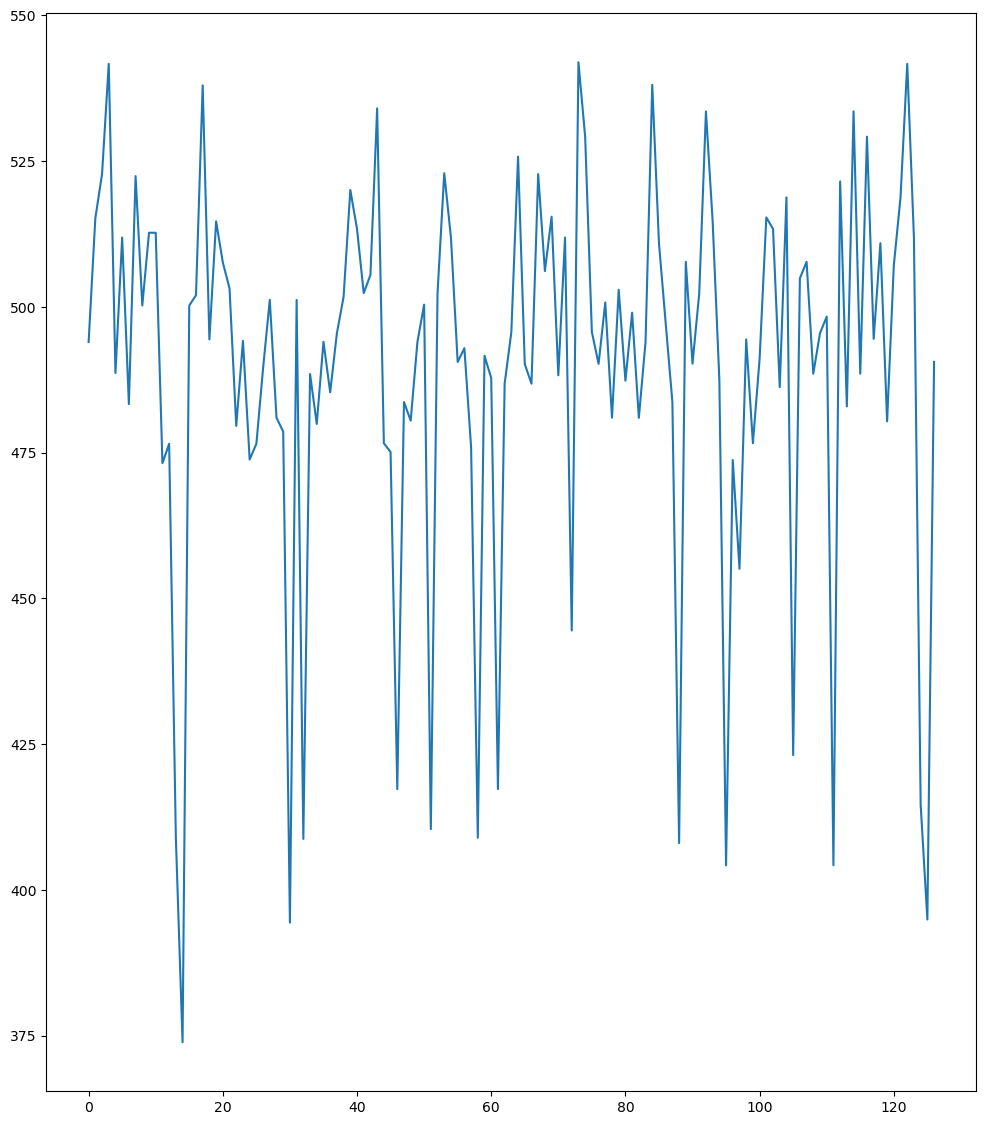

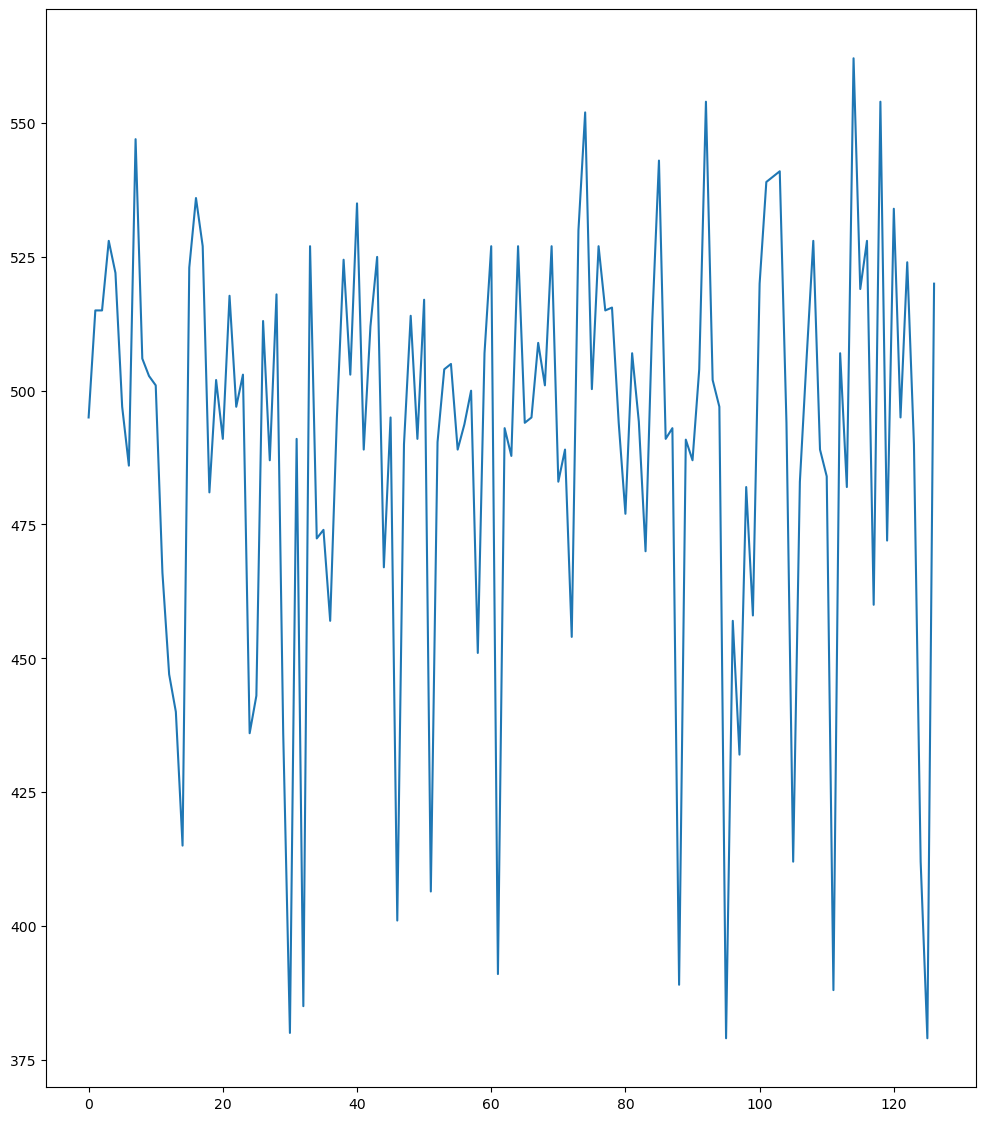

In [ ]:
# Selecting features with a high correlation to 
X_features = ['country', 
              'tax_revenue', 
              'taxes_on_income_profits_capital', 
              'intentional_homicides', 
              'gini_index', 
              'time', 
              'mortality_rate_infant', 
              'gdp_per_capita_ppp', 
              'unemployment',

              'suicide_mortality_rate',
              'government_health_expenditure_pct_gdp',
              'gdp_per_capita_ppp',
              'population_density', 
              'gross_fixed_capital_formation',
              'alcohol_consumption_per_capita']

X = df[X_features]
y = df['rating'].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_hat = linear_model.predict(X_test)

plt.figure(figsize=[12,14])
plt.plot(y_hat, label="Predicted")
plt.show()

plt.figure(figsize=[12,14])
plt.plot(y_test, label="Actual")
plt.show()


